# IA - Assignment 2 - Supervised learning

#1. Software/Library Installation 
Scikit-learn is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including neural networks, support vector machines, random forests, gradient boosting, k-means and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

Start by installing Python, Anaconda, Jupyter Labs, NumPy, SciPy, Pandas, Scikit-Learn, MatPlotLib and Seaborn. In fact, it is only needed to install Anaconda that contain all the others following the link: https://www.anaconda.com/products/individual 
Information about the rest of the packages/libraries may be found at: 

•	Python Website, https://www.python.org/   
•	Anaconda Website, https://www.anaconda.com/   
•	Project Jupyter Website, https://jupyter.org/   
•	NumPy Website, https://numpy.org/   
•	SciPy Website, https://www.scipy.org/  
•	Pandas Website, https://pandas.pydata.org/  
•	Scikit-Learn Website, https://scikit-learn.org/  
•	MatPlotLib Website, https://matplotlib.org/  
•	Seaborn Website, https://seaborn.pydata.org/  

## 2. Extended Steel Plate Defect data set – Data Preprocessing and Simple Classification

The original Steel Plate Defect data set is a multivariate data set provided by the Semeion institute, in Italy. The data set studied in this notebook is an extension of that data set, with 1940 new rows, provided by the UC Irvine Machine Learning Repository.

The data set consists of samples of multiple steel plates, with multiple features describing the properties of the defect, such as its position and area. In this assignment, we will use supervised learning machine learning algorithms to analyze the dataset and train a model capable of classifying the defects.

Importing the dataset


In [1]:
import pandas

steel_data = pandas.read_csv('extended_steel_train.csv')
pandas.set_option('display.max_columns', None)  # or 1000
pandas.set_option('display.max_rows', None)  # or 1000
steel_data.head()
steel_data.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scratch,Stains,Dirtiness,Bumps,Other_Faults
count,21159.000000,21159.000000,2.115900e+04,2.115900e+04,21159.000000,21159.000000,21159.000000,2.115900e+04,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000
mean,697.161019,741.424878,1.831569e+06,1.828712e+06,1703.308710,97.144525,65.853490,1.931816e+05,84.785009,128.790207,1459.322511,0.402429,0.596673,76.444539,0.351007,0.409766,0.574195,0.030863,0.614369,0.829976,0.590397,2.475212,1.314798,1.390966,0.100924,-0.137725,0.573142,0.076705,0.063330,0.180680,0.030247,0.025521,0.244104,0.341746
std,532.048083,501.149392,1.892936e+06,1.886280e+06,3884.880106,192.513769,161.191305,4.489439e+05,29.121968,14.672587,145.469705,0.490399,0.490577,54.043713,0.317311,0.125406,0.260511,0.048494,0.224388,0.222278,0.482092,0.763238,0.469165,0.410280,0.488912,0.123236,0.332911,0.266129,0.243561,0.384762,0.171271,0.157705,0.429565,0.474306
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,1227.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.008300,0.001500,0.014400,0.048400,0.000000,0.301000,0.301000,0.000000,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,214.000000,6.394900e+05,6.395070e+05,88.000000,15.000000,14.000000,9.778000e+03,68.000000,124.000000,1358.000000,0.000000,0.000000,40.000000,0.059100,0.317500,0.375000,0.006600,0.450000,0.650000,0.000000,1.944500,1.000000,1.079200,-0.272700,-0.192600,0.253200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,754.000000,772.000000,1.378585e+06,1.378465e+06,169.000000,25.000000,24.000000,1.840200e+04,90.000000,127.000000,1364.000000,0.000000,1.000000,69.000000,0.237100,0.413300,0.545400,0.009500,0.636400,0.961500,1.000000,2.227900,1.146100,1.322200,0.111100,-0.142600,0.472900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1145.000000,1161.000000,2.339627e+06,2.336588e+06,659.000000,67.000000,62.000000,6.841600e+04,105.000000,135.000000,1652.000000,1.000000,1.000000,80.000000,0.648800,0.495200,0.818200,0.019200,0.785700,1.000000,1.000000,2.818900,1.431400,1.716000,0.526300,-0.082800,0.999400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,1794.000000,1.000000,1.000000,300.000000,0.995200,0.943900,1.000000,0.875900,1.000000,1.000000,1.000000,5.183700,3.074100,4.258700,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As we can see, there are 21 rows that indicate more than one type of defect. This could be troublesome for labeling the rows.

However, when printing out these rows, we can see that most of them are K_Scatch and Other_Faults, and all of them involve K_Scatch.

In [2]:
all_target_labels = ['Pastry', 'Z_Scratch', 'K_Scratch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
target_values = steel_data[all_target_labels]

target_values.sum(axis=1).value_counts()
filtered_by_2 = steel_data[target_values.sum(axis=1) >= 2]
print(filtered_by_2[all_target_labels])

       Pastry  Z_Scratch  K_Scratch  Stains  Dirtiness  Bumps  Other_Faults
634         0          0          1       0          0      0             1
752         0          0          1       0          0      0             1
3572        0          0          1       0          0      1             0
4416        0          0          1       0          0      0             1
4530        0          0          1       0          0      0             1
4664        0          0          1       0          0      0             1
6448        0          0          1       0          0      0             1
7589        0          0          1       0          0      0             1
8075        0          0          1       0          0      0             1
8538        0          0          1       0          0      0             1
9103        0          0          1       0          0      0             1
9388        0          0          1       0          0      0             1
10225       

##### Data processing
- Firstly, although this has no impact on results, we fixed an apparent typo in one of the target rows, which was labeled 'K_Scatch' instead of 'K_Scratch'.
- We merged the target columns into a single column used for labeling, called 'Faults'.
- Taking into account our previous observations, we collapsed the defects of rows containing more than one defect into K_Scratch.

In [206]:
#print(target_values.head(20))
#Func to merge the columns that have a certain fault set to 1 and concatenate them by ',' returning them to a new column.
def get_faults(row):
    faults = "No_Faults"
    counter = 0
    for label in all_target_labels:
        if row[label] == 1:
            counter += 1
            faults = label 
    return faults if counter < 2 else 'K_Scratch'
def get_steel_type(row):
    if row['TypeOfSteel_A300'] == 1:
        return 'A300'
    else:
        return 'A400'
steel_data = steel_data[steel_data['Other_Faults'] == 0] #dros the rows with Other_Faults set to 1
steel_data = steel_data[(steel_data[all_target_labels] == 1).any(axis=1)]
steel_data['Faults']=target_values.apply(get_faults, axis=1)
target = steel_data['Faults']

#print(steel_data[steel_data['Faults'].str.contains(',')])
#Merge steel type columns (not needed?)
#labels = ['TypeOfSteel_A300','TypeOfSteel_A400']
#target = steel_data[labels]
#steel_data['TypeOfSteel'] = target.apply(get_steel_type, axis=1)
#print(steel_data['TypeOfSteel'].head(20))
#steel_data = steel_data.drop(['Pastry', 'Z_Scratch', 'K_Scratch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'],axis=1)
print(steel_data.head(100))

     X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0          584        590     909972     909977            16            8   
2           39        192    2212076    2212144         11388          705   
3          781        789    3353146    3353173           210           16   
6          596        607     739072    7390760           204           21   
7         1673       1687     294065     294091           571           38   
9          893        907    1341292    1341296            54            6   
10        1122       1133     618457     618502           289           37   
14          39        220    1835934    1836000          6644          302   
15           1        250    4383724    4383803         25473          865   
16          41        197    2315017    2315086         11813          626   
18         833        842    2702154    2702164            67           10   
20         545        583    3980733    3980769           979   

##### Visualization of the dataset
As we can see, they are really overlapped, specially "Bumps" and "Other_Faults", they are similar in almost every aspect and feature.

In [207]:
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb


location_features = ['X_Minimum','X_Maximum','Y_Minimum','Y_Maximum','Faults']
size_features = ['Pixels_Areas','X_Perimeter','Y_Perimeter','Faults']
luminosity_features = ['Sum_of_Luminosity','Minimum_of_Luminosity','Maximum_of_Luminosity','Faults']
material_features = ['Steel_Plate_Thickness','Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index','Faults']
logaritmit_features = ['LogOfAreas','Log_X_Index', 'Log_Y_Index','Faults']
statistical_features = ['Orientation_Index','Luminosity_Index','SigmoidOfAreas','Faults']
""" sb.pairplot(steel_data[location_features],hue='Faults')
plt.show()
sb.pairplot(steel_data[size_features],hue='Faults')
plt.show()
sb.pairplot(steel_data[luminosity_features],hue='Faults')
plt.show()
sb.pairplot(steel_data[material_features],hue='Faults')
plt.show()
sb.pairplot(steel_data[logaritmit_features],hue='Faults')
plt.show()
sb.pairplot(steel_data[statistical_features],hue='Faults')
plt.show()"""       



" sb.pairplot(steel_data[location_features],hue='Faults')\nplt.show()\nsb.pairplot(steel_data[size_features],hue='Faults')\nplt.show()\nsb.pairplot(steel_data[luminosity_features],hue='Faults')\nplt.show()\nsb.pairplot(steel_data[material_features],hue='Faults')\nplt.show()\nsb.pairplot(steel_data[logaritmit_features],hue='Faults')\nplt.show()\nsb.pairplot(steel_data[statistical_features],hue='Faults')\nplt.show()"

The data contained several errors to demonstrate some of the many possible scenarios you may face while tidying your data. The general takeaways here should be:
- Make sure your data is encoded properly
- Make sure your data falls within the expected range, and use domain knowledge whenever possible to define that expected range
- Deal with missing data in one way or another: replace it if you can or drop it
- Never tidy your data manually because that is not easily reproducible
- Use code as a record of how you tidied your data

Plot everything you can about the data at this stage of the analysis so you can *visually* confirm everything looks correct

After spending entirely too much time tidying our data, we can start analyzing it! Exploratory analysis is the step where we start delving deeper into the data set beyond the outliers and errors. We'll be looking to answer questions such as:

- How is my data distributed?
- Are there any correlations in my data?
- Are there any confounding factors that explain these correlations?
This is the stage where we plot all the data in as many ways as possible. Create many charts, but don't bother making them pretty — these charts are for internal use. 

Let's return to that scatterplot matrix that we used earlier.

There is a strange distribution of the petal measurements because of the different species. This is actually great news for our classification task since it means that the petal measurements will make it easy to distinguish between `Iris-setosa` and the other `Iris` types. Distinguishing `Iris-versicolor` and `Iris-virginica` will prove more difficult given how much their measurements overlap. There are also correlations between petal length and petal width, as well as sepal length and sepal width. The field biologists assure us that this is to be expected: Longer flower petals also tend to be wider, and the same applies for sepals. We can also make violin plots of the data to compare the measurement distributions of the classes. 

j)	Create some violin plots of the data to compare the measurement distributions of the classes. Violin plots contain the same information as box plots, but also scales the box according to the density of the data.

## Classification

Lets start modeling the data! As tiresome as it can be, tidying and exploring our data is a vital component to any data analysis. If we had jumped straight to the modeling step, we would have created a faulty classification model. Remember: Bad data leads to bad models. Always check your data first.
Assured that our data is now as clean as we can make it — and armed with some cursory knowledge of the distributions and relationships in our data set — it's time to make the next big step in our analysis: Splitting the data into training and testing sets.
- training set: is a random subset of the data that we use to train our models.
- testing set: is a random subset of the data (mutually exclusive from the training set) that we use to validate our models on unforseen data.

Especially in sparse data sets like ours, it's easy for models to overfit the data: The model will learn the training set so well that it won't be able to handle most of the cases it's never seen before. This is why it's important for us to build the model with the training set, but score it with the testing set.

Note that once we split the data into a training and testing set, we should treat the testing set like it no longer exists: We cannot use any information from the testing set to build our model or else we're cheating. Let's set up our data first.

k) Create two variables with the inputs and labels using the clean dataset created. 

In [208]:
#iris_data_clean = pandas.read_csv('iris-data-clean.csv')

# We're using all four measurements as inputs
# Note that scikit-learn expects each entry to be a list of values, e.g.,
# [ [val1, val2, val3],
#   [val1, val2, val3],
#   ... ]
# such that our input data set is represented as a list of lists

# We can extract the data in this format from pandas like this:
#all_inputs = iris_data_clean[['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']].values
features = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
               'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
               'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
               'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
               'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
               'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
               'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
               'SigmoidOfAreas']
steel_inputs = steel_data[features].values

# Similarly, we can extract the class labels
#all_labels = iris_data_clean['class'].values
steel_labels = steel_data['Faults'].values
# Make sure that you don't mix up the order of the entries
# all_inputs[5] inputs should correspond to the class in all_labels[5]


Now our data is ready to be split.

l)	import the train_test_split and create randomly training and testing sets with 75% of the examples on the training set and 25% on the testing set: training_inputs, testing_inputs, training_classes, testing_classes

In [209]:
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(steel_inputs, steel_labels, test_size=0.75, random_state=1)

After training the model and evaluating its performance:

0.7168717583646903
              precision    recall  f1-score   support

       Bumps       0.73      0.71      0.72      3863
   Dirtiness       0.29      0.33      0.31       404
   K_Scratch       0.91      0.92      0.92      2860
      Pastry       0.39      0.41      0.40      1208
      Stains       0.86      0.83      0.85       491
   Z_Scratch       0.65      0.64      0.64      1007

    accuracy                           0.72      9833
   macro avg       0.64      0.64      0.64      9833
weighted avg       0.72      0.72      0.72      9833



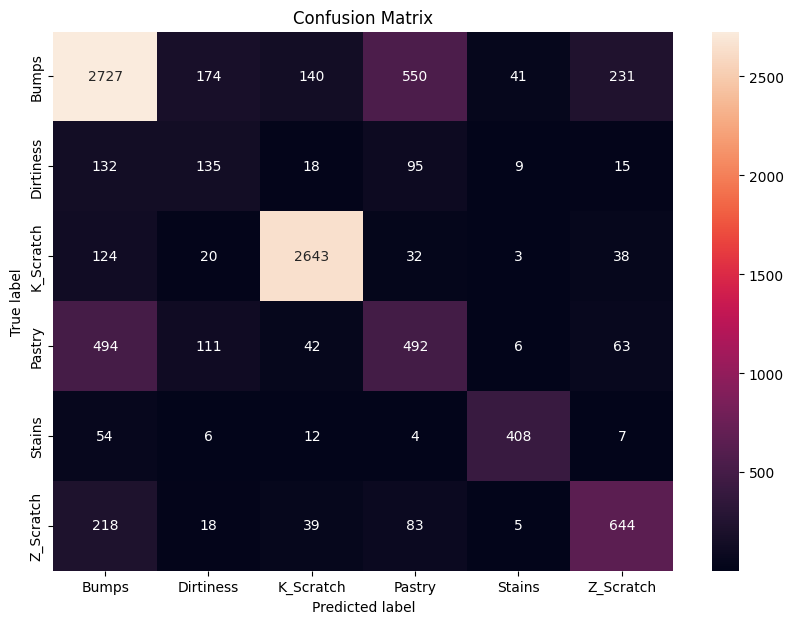

In [210]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report


# Create the classifier
# Your Code Here
clf = DecisionTreeClassifier()

# Train the classifier on the training set
# Your Code Here
clf.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
# Your Code Here
score = clf.score(testing_inputs, testing_classes)
print(score)
class_pred = clf.predict(testing_inputs)
cm = confusion_matrix(testing_classes, class_pred)
class_labels = np.unique(testing_classes)

report = classification_report(testing_classes, class_pred, target_names=class_labels)
print(report)
# Create a DataFrame from the confusion matrix for easier plotting
cm_df = pandas.DataFrame(cm, index=class_labels, columns=class_labels)

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


The model achieves a poor 49% of classification accuracy because "Bumps" and "Other_Faults" are often confused by the model, just like we infered previously with other plotted graphs.
So we tested using feature engineering for many new features we tried to create to distinguish those:


In [211]:
def calculate_area(steel_data):
    x_range = steel_data['X_Maximum'] - steel_data['X_Minimum']
    y_range = steel_data['Y_Maximum'] - steel_data['Y_Minimum']  
    steel_data["XY_Area"] = x_range * y_range
    return steel_data

def calculate_range_XY(steel_data):
    steel_data["X_Range"] = abs(steel_data['X_Maximum'] - steel_data['X_Minimum'])
    steel_data["Y_Range"] = abs(steel_data['Y_Maximum'] - steel_data['Y_Minimum'])  
    return steel_data
def calculate_Size_Ratio(steel_data):
    steel_data["Size_Ratio"] = steel_data['Pixels_Areas'] / (steel_data['X_Perimeter'] + steel_data['Y_Perimeter'])
    return steel_data
def calculate_luminosity_range_feature(data):
    data['Luminosity_Range'] = (data['Maximum_of_Luminosity'] - data['Minimum_of_Luminosity'])
    return data


data1=calculate_range_XY(steel_data)
data2=calculate_area(steel_data)
data3=calculate_Size_Ratio(steel_data)
data4=calculate_luminosity_range_feature(steel_data)

data5=calculate_range_XY(steel_data)
data5=calculate_Size_Ratio(steel_data)
data5=calculate_luminosity_range_feature(steel_data)

datas = [data1,data2,data3,data4,data5]

for data in datas:
    new_features = ['XY_Area','X_Range','Y_Range','Size_Ratio','Luminosity_Range']
    res_features = features + new_features
    values = data[res_features].values
    (training_inputs,
    testing_inputs,
    training_classes,
    testing_classes) = train_test_split(values, steel_labels, test_size=0.75, random_state=1)
    clf.fit(training_inputs, training_classes)
    score = clf.score(testing_inputs, testing_classes)
    print(score)


0.7131089189464049
0.7205328994203193
0.7153462829248449
0.7184989321671921
0.7133123156717177


In [212]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': range(1, len(features)),}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)
grid_search.fit(steel_inputs, steel_labels)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': range(1, 27),
                         'splitter': ['best', 'random']})

In [213]:
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.7510297482837528
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 23, 'splitter': 'best'}


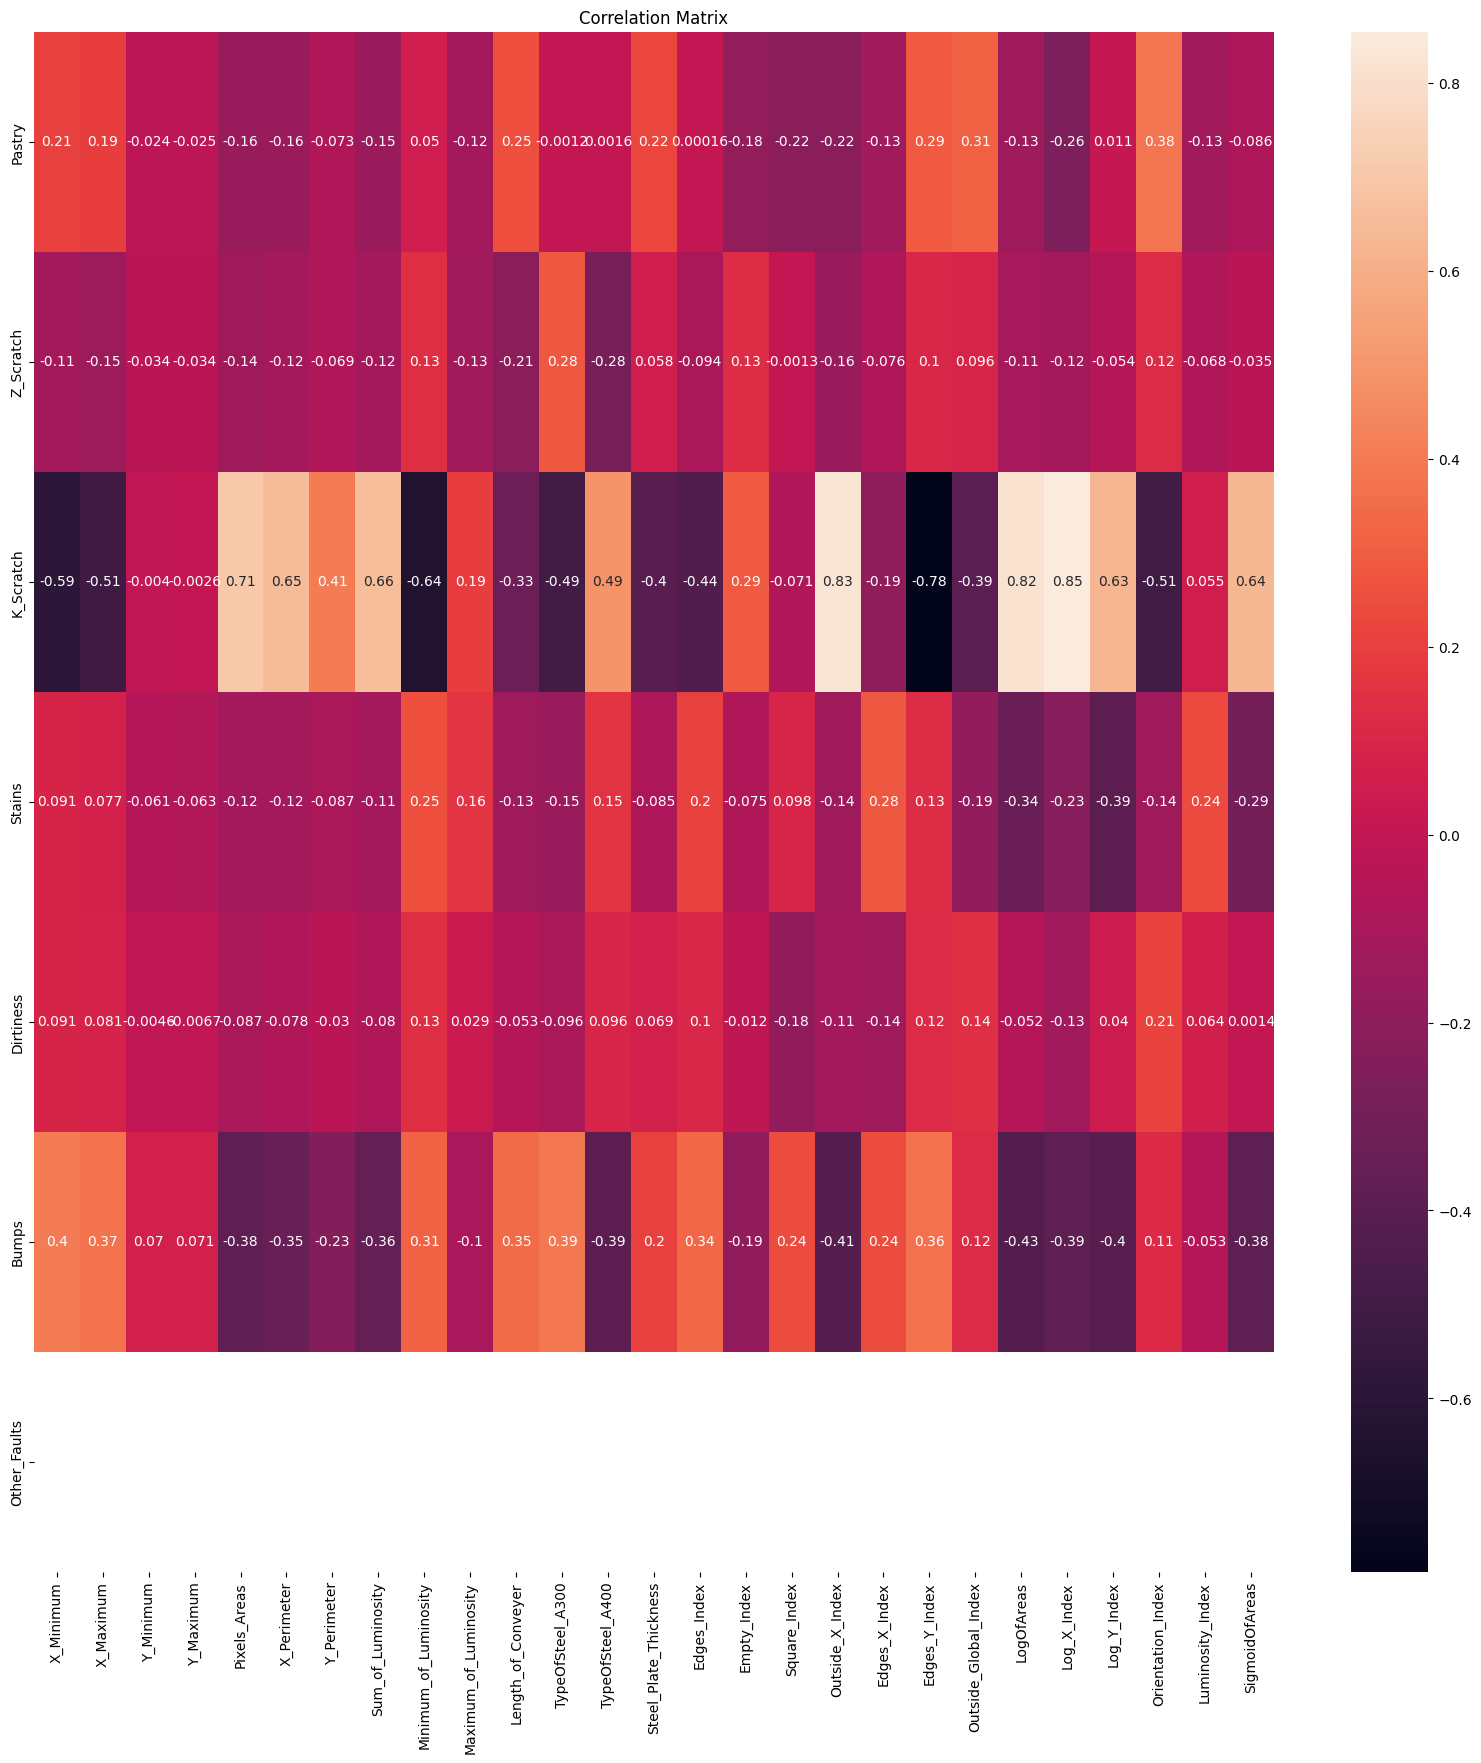

In [216]:
from sklearn.preprocessing import LabelEncoder

selected_data=steel_data[features+all_target_labels]
correlation_matrix = selected_data.corr()
correlation_matrix = correlation_matrix.loc[all_target_labels, features]


# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

We tried to implement another model for this problem, K-NN:

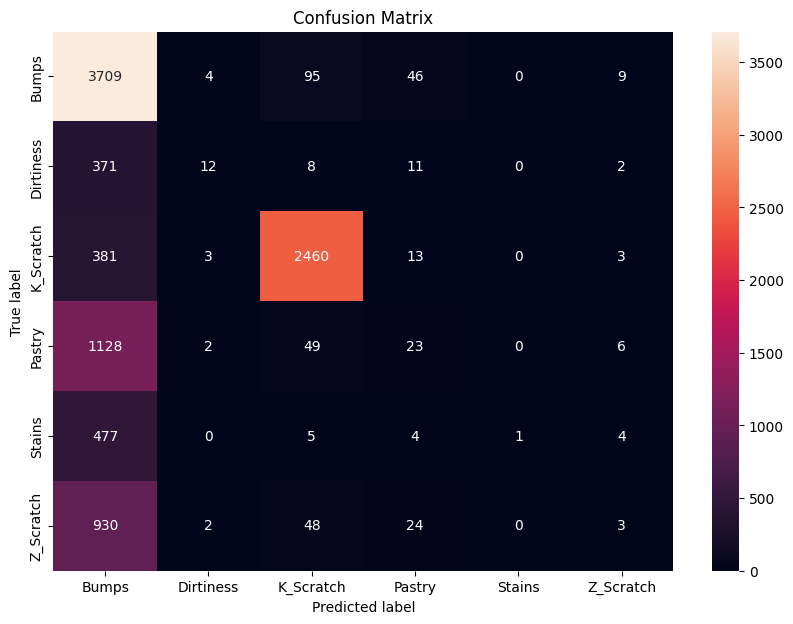

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

steel_inputs= steel_data[features].values
steel_labels = steel_data['Faults'].values
(training_inputs,
    testing_inputs,
    training_classes,
    testing_classes)= train_test_split(steel_inputs, steel_labels, test_size=0.75, random_state=1)
k=20
prev_score = 0
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(training_inputs, training_classes)
    score = knn.score(testing_inputs, testing_classes)

    if score > prev_score:
        
        print(k)
"""knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(training_inputs, training_classes)
class_pred = knn.predict(testing_inputs)
score = knn.score(testing_inputs, testing_classes)
report = classification_report(testing_classes, class_pred, target_names=class_labels)
print(score)"""

cm = confusion_matrix(testing_classes, class_pred)
class_labels=np.unique(testing_classes)
# Create a DataFrame from the confusion matrix for easier plotting
cm_df = pandas.DataFrame(cm, index=class_labels, columns=class_labels)

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


They did not differ much in accuracy.

(array([ 2.,  0.,  8.,  4.,  8., 10., 12.,  5.,  0.,  1.]),
 array([0.70683344, 0.71110433, 0.71537523, 0.71964613, 0.72391702,
        0.72818792, 0.73245882, 0.73672971, 0.74100061, 0.74527151,
        0.7495424 ]),
 <BarContainer object of 10 artists>)

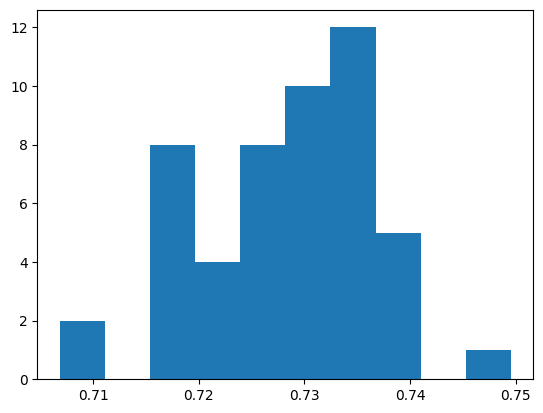

In [ ]:
model_accuracies = []

for repetition in range(50):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(steel_inputs, steel_labels, test_size=0.25)
    
    # Your Code Here
    clf = DecisionTreeClassifier()
    clf.fit(training_inputs, training_classes)
    model_accuracies.append(clf.score(testing_inputs, testing_classes))

plt.hist(model_accuracies)

It's obviously a problem that our model performs quite differently depending on the subset of the data it's trained on. This phenomenon is known as overfitting: The model is learning to classify the training set so well that it doesn't generalize and perform well on data it hasn't seen before. 

This problem is the main reason that most data scientists perform k-fold cross-validation on their models: Split the original data set into k subsets, use one of the subsets as the testing set, and the rest of the subsets are used as the training set. This process is then repeated k times such that each subset is used as the testing set exactly once. 10-fold cross-validation is the most common choice, so let's use that here. Performing 10-fold cross-validation on our data set looks something like this:(each square is an entry in our data set)

[0.7397803538743136, 0.7272727272727273, 0.7068334350213545, 0.7184258694325808, 0.726967663209274, 0.7223917022574741, 0.74954240390482, 0.7352043929225137, 0.7199511897498475, 0.7190359975594874, 0.7199511897498475, 0.7300183038438072, 0.7239170225747407, 0.7300183038438072, 0.7278828553996339, 0.7318486882245272, 0.7324588163514338, 0.7361195851128737, 0.7318486882245272, 0.735509456985967, 0.7098840756558877, 0.7300183038438072, 0.735509456985967, 0.7345942647956071, 0.7370347773032336, 0.7172056131787675, 0.7239170225747407, 0.7318486882245272, 0.7169005491153142, 0.7272727272727273, 0.7367297132397803, 0.7309334960341671, 0.7172056131787675, 0.7321537522879805, 0.7339841366687004, 0.7342892007321538, 0.7226967663209274, 0.7281879194630873, 0.7370347773032336, 0.7193410616229409, 0.7345942647956071, 0.7406955460646736, 0.7318486882245272, 0.7278828553996339, 0.7181208053691275, 0.7352043929225137, 0.7333740085417938, 0.7239170225747407, 0.7156802928615009, 0.7345942647956071]


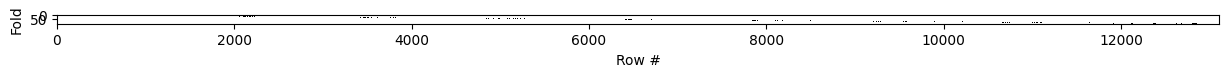

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
limit = 500
i =0;
print(model_accuracies)
def plot_cv(cv, features, labels):
    masks = []
    for train, test in cv.split(features, labels):
        mask = np.zeros(len(labels), dtype=bool)
        mask[test] = 1
        masks.append(mask)
        if(i>limit):
            break
    
    plt.figure(figsize=(15, 15))
    plt.imshow(masks, interpolation='none', cmap='gray_r')
    plt.ylabel('Fold')
    plt.xlabel('Row #')

plot_cv(StratifiedKFold(n_splits=100), steel_inputs, steel_labels)

You'll notice that we used Stratified k-fold cross-validation in the code above. Stratified k-fold keeps the class proportions the same across all of the folds, which is vital for maintaining a representative subset of our data set. (e.g., so we don't have 100% `Iris setosa` entries in one of the folds.)

o)	Import StratifiedKFold and use stratified cross-validation with 10 splits and train again the data.

Text(0.5, 1.0, 'Average score: 0.7299791019649957')

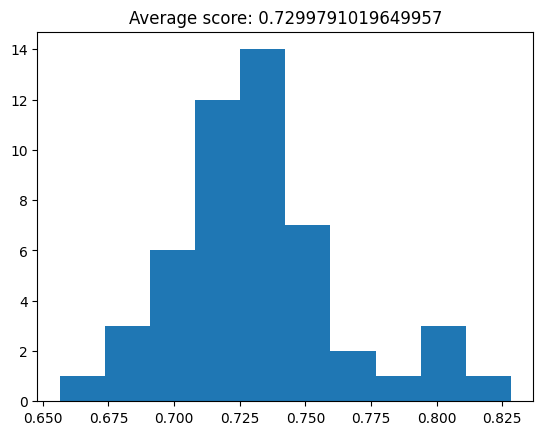

In [ ]:
from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(clf, steel_inputs, steel_labels, cv=50)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

Now we have a much more consistent rating of our classifier's general classification accuracy. However, every Machine Learning model comes with a variety of parameters to tune, and these parameters can be vitally important to the performance of our classifier. For example, if we severely limit the depth of our decision tree classifier:

In [ ]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

NameError: name 'all_inputs' is not defined

The classification accuracy falls tremendously! Therefore, we need to find a systematic method to discover the best parameters for our model and data set. 

The most common method for model parameter tuning is Grid Search. The idea behind Grid Search is simple: explore a range of parameters and find the best-performing parameter combination. Focus your search on the best range of parameters, then repeat this process several times until the best parameters are discovered.

Let's tune our decision tree classifier. We'll stick to only two parameters for now, but it's possible to simultaneously explore dozens of parameters if we want.

p)	Import GridSearchCV and perform a Grid Search over the Decision Tree parameters to find the best parameters, visualizing the grid with the accuracies for each parameter’s pairs (max_features 1-4 and max_depth 1-5). 

In [ ]:
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': list(range(1, 10)),# Your Code Here ...
                  'max_features': list(range(1, 27))}# Your Code Here ... }

cross_validation = 100

grid_search = GridSearchCV( decision_tree_classifier, parameter_grid, cv=cross_validation
                            )

grid_search.fit(steel_inputs, steel_labels)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

KeyboardInterrupt: 

Now let's visualize the grid search to see how the parameters interact.

q)	Visualize in a graphical manner the final decision tree achieved. 

Text(50.722222222222214, 0.5, 'max_depth')

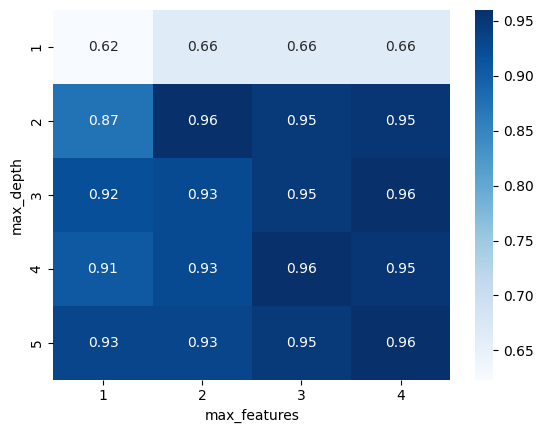

In [ ]:
grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (5, 4)
sb.heatmap(grid_visualization, cmap='Blues', annot=True)
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth')

Now we have a better sense of the parameter space: We know that we need a `max_depth` of at least 2 to allow the decision tree to make more than a one-off decision. `max_features` doesn't really seem to make a big difference here as long as we have 2 of them, which makes sense since our data set has only 4 features and is relatively easy to classify. (Remember, one of our data set's classes was easily separable from the rest based on a single feature.) Let's go ahead and use a broad grid search to find the best settings for a handful of parameters.

In [ ]:
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9733333333333334
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 2, 'splitter': 'best'}


Now we can take the best classifier from the Grid Search and use that:

In [ ]:
decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(max_depth=5, max_features=2)

We can even visualize the decision tree with [GraphViz](http://www.graphviz.org/) to see how it's making the classifications:

In [ ]:
import sklearn.tree as tree

with open('iris_dtc.dot', 'w') as out_file:
    out_file = tree.export_graphviz(decision_tree_classifier, out_file=out_file)

<img src="iris_dtc.png" />